In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

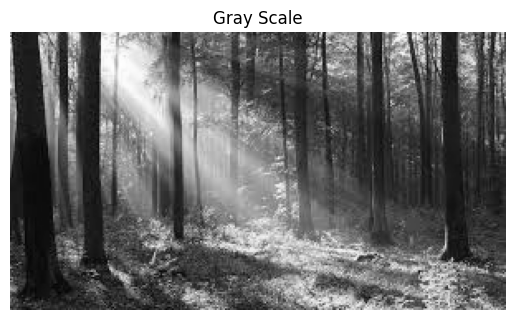

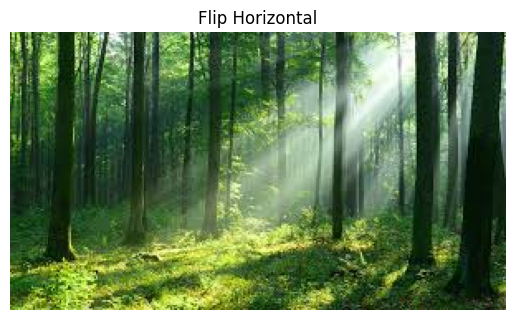

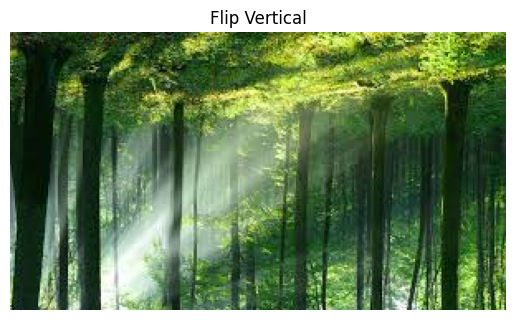

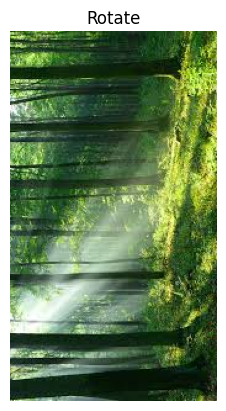

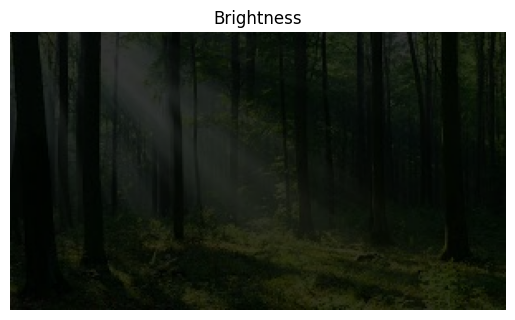

In [11]:
def load_image(path):
    return np.array(Image.open(path))


def save_image(np_img, path):
    img = Image.fromarray(np_img.astype(np.uint8))
    img.save(path)


def show_image(np_img, title='Image'):
    plt.imshow(np_img)
    plt.title(title)
    plt.axis('off')
    plt.show()


def to_grayscale(np_img):
    if np_img.ndim == 3 and np_img.shape[2] == 3:
        gray = np.dot(np_img[..., :3], [0.299, 0.587, 0.114])
        return np.stack((gray,) * 3, axis=-1).astype(np.uint8)
    return np_img


def flip_horizontal(np_img):
    return np_img[:, ::-1]


def flip_vertical(np_img):
    return np_img[::-1]


def rotate_image(np_img, angle):
    if angle == 90:
        return np.rot90(np_img, k=1)
    elif angle == 180:
        return np.rot90(np_img, k=2)
    elif angle == 270:
        return np.rot90(np_img, k=3)
    else:
        raise ValueError('Only 90, 180, and 270 degrees supported.')


def adjust_brightness(np_img, factor):
    return np.clip(np_img * factor, 0, 255).astype(np.uint8)


if __name__ == '__main__':
    img = load_image('nature.jpg')
    gray = to_grayscale(img)
    flipped_horizontal = flip_horizontal(img)
    flipped_vertical = flip_vertical(img)
    rotated = rotate_image(img, 90)
    bright = adjust_brightness(img, 0.2)
    show_image(gray, 'Gray Scale')
    show_image(flipped_horizontal, 'Flip Horizontal')
    show_image(flipped_vertical, 'Flip Vertical')
    show_image(rotated, 'Rotate')
    show_image(bright, 'Brightness')
    save_image(bright, 'Brighter_output.png')